# Python as a Automation Tool

- Automation of Excel Report using Python
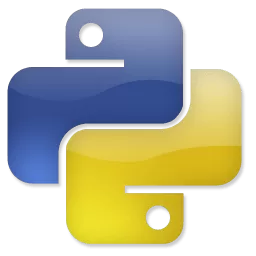

In [1]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference
import string

In [2]:
# create monthly transactional data from dump

df = pd.read_excel('supermarket_sales.xlsx')

for month in range(1, 13):
    df_per_month = df[df['Date'].dt.month == month]
    df_per_month.to_excel(f'sales_{month}.xlsx')

In [3]:
# enter the file path i.e month for which you need the report
file_path = 'sales_1.xlsx'

In [4]:
def automate_excel(file_path):
    """The file name should have the following structure: sales_month.xlsx"""
    # read excel file
    excel_file = pd.read_excel(file_path)
    # make pivot table
    report_table = excel_file.pivot_table(index='Branch', columns='Product line', values='Total', aggfunc='sum').round(0)
    # splitting the month and extension from the file name
    month_and_extension = file_path.split('_')[1]
    # send the report table to excel file
    report_table.to_excel(f'report_{month_and_extension}', sheet_name='Report', startrow=4)
    # loading workbook and selecting sheet
    wb = load_workbook(f'report_{month_and_extension}')
    sheet = wb['Report']
    # cell references (original spreadsheet)
    min_column = wb.active.min_column
    max_column = wb.active.max_column
    min_row = wb.active.min_row
    max_row = wb.active.max_row
    # adding a chart
    barchart = BarChart()
    data = Reference(sheet, min_col=min_column+1, max_col=max_column, min_row=min_row, max_row=max_row) #including headers
    categories = Reference(sheet, min_col=min_column, max_col=min_column, min_row=min_row+1, max_row=max_row) #not including headers
    barchart.add_data(data, titles_from_data=True)
    barchart.set_categories(categories)
    sheet.add_chart(barchart, "B12") #location chart
    barchart.title = 'Sales by Product line & Branch'
    barchart.style = 2 #choose the chart style
    # applying formulas
    # first create alphabet list as references for cells
    alphabet = list(string.ascii_uppercase)
    excel_alphabet = alphabet[0:max_column] #note: Python lists start on 0 -> A=0, B=1, C=2. #note2 the [a:b] takes b-a elements
    # sum in columns B-G
    for i in excel_alphabet:
        if i!='A':
            sheet[f'{i}{max_row+1}'] = f'=SUM({i}{min_row+1}:{i}{max_row})'
            sheet[f'{i}{max_row+1}'].style = 'Currency'
    sheet[f'{excel_alphabet[0]}{max_row+1}'] = 'Total'
    # getting month name
    month_name = month_and_extension.split('.')[0]
    # formatting the report
    sheet['A1'] = 'Sales Report'
    sheet['A2'] = month_name.title()
    sheet['A1'].font = Font('Arial', bold=True, size=20)
    sheet['A2'].font = Font('Arial', bold=True, size=10)
    wb.save(f'report_{month_and_extension}')
    return

In [5]:
automate_excel(file_path)

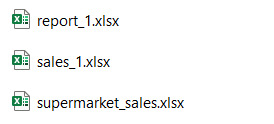

Reference:

- [Hevodata](https://hevodata.com/learn/python-excel-automation/)
- [Medium](https://towardsdatascience.com/a-simple-guide-to-automate-your-excel-reporting-with-python-9d35f143ef7)

## Convert above python script to executable file

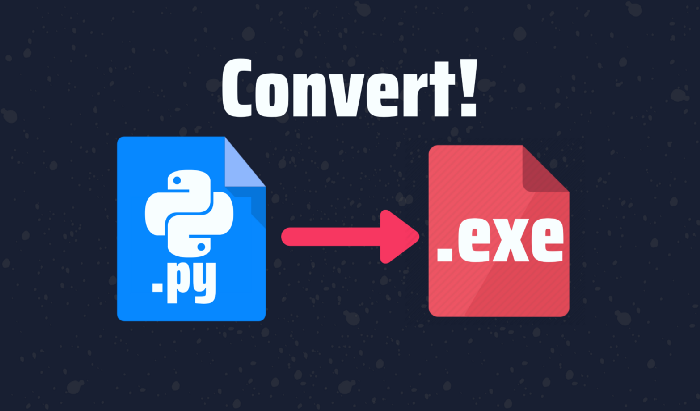

- ### [Medium](https://towardsdatascience.com/how-to-easily-convert-a-python-script-to-an-executable-file-exe-4966e253c7e9)
